<p style="color: brown; font-size: 24px;">
  <strong><em>Analyzing intraprotein interactions for regions of interest:</em></strong><br>
  <span style="font-size: 18px; font-style: italic;">ProLif, MDAnalysis</span><br>
  <strong><em>Creating interaction maps:</em></strong><br>
  <span style="font-size: 18px; font-style: italic;">Pandas, Numpy, Networkx, Matplotlib, Seaborn</span>
</p>

In [1]:
import MDAnalysis as mda
import prolif as plf
from IPython.display import display
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

### <span style="color:brown;"><em> 1) Creating objects and assigning regions of interest: </em></span>

In [2]:
from PATH_pdb_xtc import *   # from PATH_pdb_xtc.py

In [3]:
# Create Universe objects
protein_systems = {
    "wt": (wt_LF, wt_traj),
    "S718C": (S718C, S718C_traj),
    "P720R": (P720R, P720R_traj),
    "P720Q": (P720Q, P720Q_traj),
    "S719del": (S719del, S719del_traj),
    "PD720_721R": (PD720_721R, PD720_721R_traj),
    "T739A": (T739A, T739A_traj)
}

universes = {}

In [4]:
for name, (pdb, traj) in protein_systems.items():
    universes[name] = mda.Universe(pdb, traj)

In [5]:
selection_binding_motif_interactions = {
    "wt": "protein and (resid 718:721)",
    "S718C": "protein and (resid 718:721)",
    "P720R": "protein and (resid 718:721)",
    "P720Q": "protein and (resid 718:721)",
    "S719del": "protein and (resid 718:721)",
    "PD720_721R": "protein and (resid 718:721)",
    "T739A": "protein and (resid 738:740)"  # and check interactions for 739
}

In [6]:
selections_binding_motif = {}
for name, universe in universes.items():
    selections_binding_motif[name] = universe.select_atoms(selection_binding_motif_interactions[name])

In [7]:
selection_ww_like_interactions = {
    "wt": "protein and (resid 645:684)",
    "S718C": "protein and (resid 645:684)",
    "P720R": "protein and (resid 645:684)",
    "P720Q": "protein and (resid 645:684)",
    "S719del": "protein and (resid 645:684)",
    "PD720_721R": "protein and (resid 645:684)",
    "T739A": "protein and (resid 645:684)"
}

In [8]:
selections_ww_like = {}
for name, universe in universes.items():
    selections_ww_like[name] = universe.select_atoms(selection_ww_like_interactions[name])

In [9]:
rest_prot_selections_binding_motif = {}
for name, universe in universes.items():
    selection_query = "protein and not ({})".format(selection_binding_motif_interactions[name])
    rest_prot_selections_binding_motif[name] = universe.select_atoms(selection_query)

In [10]:
rest_prot_selections_ww_like = {}
for name, universe in universes.items():
    selection_query = "protein and not ({})".format(selection_ww_like_interactions[name])
    rest_prot_selections_ww_like[name] = universe.select_atoms(selection_query)

In [12]:
# # Check: Molecules visualization for binding motif (resid 718-721)
# for name, selection in selections_binding_motif.items():
#     selection.guess_bonds()
#     print(f"res 718-721 {name.upper()} :")
#     display(plf.display_residues(plf.Molecule.from_mda(selection)))

# # Check: Molecules visualization for ww-like (resid 645-684)
# for name, selection in selections_ww_like.items():
#     selection.guess_bonds()
#     print(f"res 645-684 {name.upper()} :")
#     display(plf.display_residues(plf.Molecule.from_mda(selection)))

### <span style="color:brown;"><em> 2) Running intraprotein interaction analysis: </em></span>

#### <span style="color:brown;"><em> Intraprotein interactions between the mutant positions 718-721, 739 and the rest of the protein: </em></span>

In [15]:
results_binding_motif = {}

proteins = [
    'wt', 
    'S718C', 
    'P720R', 
    'P720Q', 
    'S719del',
    'PD720_721R', 
    'T739A'
]

# Run interaction analysis for the 718-721,739 region
fp = plf.Fingerprint()
for protein in proteins:
    print(f"Running interaction analysis for binding motif (resid 718-721) in protein: {protein.upper()}")
    fp.run(universes[protein].trajectory, selections_binding_motif[protein], rest_prot_selections_binding_motif[protein])
    df = fp.to_dataframe()
    results_binding_motif[protein] = df
    
    # Save the DataFrame
    with open(f'{protein}_binding_motif.pkl', 'wb') as file:
        pickle.dump(df, file)
    print(f'File {protein}_binding_motif.pkl has been saved.')

Running interaction analysis for binding motif (resid 718-721) in protein: WT


  0%|          | 0/10001 [00:00<?, ?it/s]

File wt_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: S718C


  0%|          | 0/10001 [00:00<?, ?it/s]

File S718C_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: P720R


  0%|          | 0/10001 [00:00<?, ?it/s]

File P720R_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: P720Q


  0%|          | 0/10001 [00:00<?, ?it/s]

File P720Q_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: S719DEL


  0%|          | 0/10001 [00:00<?, ?it/s]

File S719del_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: PD720_721R


  0%|          | 0/10001 [00:00<?, ?it/s]

File PD720_721R_binding_motif.pkl has been saved.
Running interaction analysis for binding motif (resid 718-721) in protein: T739A


  0%|          | 0/10001 [00:00<?, ?it/s]

File T739A_binding_motif.pkl has been saved.


#### <span style="color:brown;"><em> Intraprotein interactions between the 645-684 region (WW-like domain) and the rest of the protein: </em></span>

In [54]:
results_ww_like = {}

proteins = [
    'wt', 
    'S718C', 
    'P720R', 
    'P720Q', 
    'S719del',
    'PD720_721R', 
    'T739A'
]

# Run interaction analysis for the ww-like domain region
fp = plf.Fingerprint()
for protein in proteins:
    print(f"Running interaction analysis for ww-like region (resid 645-684) in protein: {protein.upper()}")
    fp.run(universes[protein].trajectory, selections_ww_like[protein], rest_prot_selections_ww_like[protein])
    df = fp.to_dataframe()
    results_ww_like[protein] = df
    
    with open(f'{protein}_ww-like.pkl', 'wb') as file:
        pickle.dump(df, file)
    print(f'File {protein}_ww-like.pkl has been saved.')

Running interaction analysis for ww-like region (resid 645-684) in protein: WT


  0%|          | 0/10001 [00:00<?, ?it/s]

File wt_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: S718C


  0%|          | 0/10001 [00:00<?, ?it/s]

File S718C_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: P720R


  0%|          | 0/10001 [00:00<?, ?it/s]

File P720R_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: P720Q


  0%|          | 0/10001 [00:00<?, ?it/s]

File P720Q_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: S719DEL


  0%|          | 0/10001 [00:00<?, ?it/s]

File S719del_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: PD720_721R


  0%|          | 0/10001 [00:00<?, ?it/s]

File PD720_721R_ww-like.pkl has been saved.
Running interaction analysis for ww-like region (resid 645-684) in protein: T739A


  0%|          | 0/10001 [00:00<?, ?it/s]

File T739A_ww-like.pkl has been saved.


#### <span style="color:brown;"><em> Visualization: </em></span>

In [55]:
# Sets the style for the axis of a plot
def set_axis_style(axis, title, xlabel, ylabel, xtick_fontsize, ytick_fontsize):
    axis.set_title(title, fontsize=13, fontweight='bold', pad=20)
    axis.set_xlabel(xlabel, fontsize=10, labelpad=10, color='brown')
    axis.set_ylabel(ylabel, fontsize=10, labelpad=10, color='brown')
    axis.tick_params(axis='x', labelsize=xtick_fontsize)
    axis.tick_params(axis='y', labelsize=ytick_fontsize)
    axis.set_yticklabels(axis.get_yticklabels(), rotation=0, ha='right', va='center')

# Prepares the DataFrame by converting multi-index columns to string column names
def prepare_dataframe(df):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    return df

# Plots a heatmap using the DataFrame
def plot_heatmap(df, title, figsize=(12, 4)):
    plt.figure(figsize=figsize)
    ax = sns.heatmap(df.T, cmap=['#ffffff', 'cadetblue'], cbar=False)
    set_axis_style(ax, title, 'Time in ns', 'Interactions', 6, 10)
    ax.hlines(range(1, df.shape[0]), *ax.get_xlim(), color='lightgrey', lw=0.5)
    ax.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5, zorder=0)
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')
    plt.show()

#### <span style="color:brown;"><em> INTERACTION MAPS of regions 718-721 and 739 with the rest of the protein: </em></span>

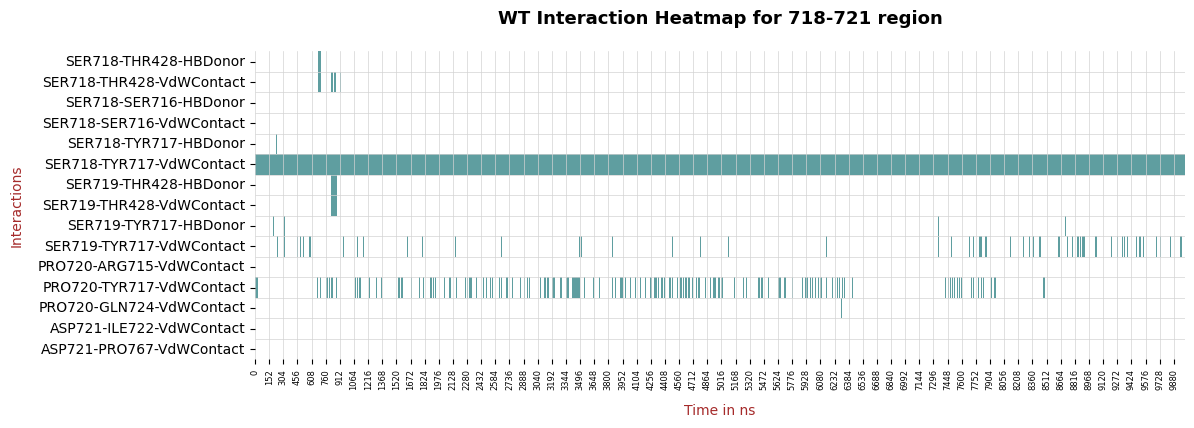

In [42]:
df_wt_binding_motif_interactions = pickle.load(open('wt_binding_motif.pkl', 'rb'))
plot_heatmap(df_S718C, 'WT Interaction Heatmap for 718-721 region', figsize=(12, 4))

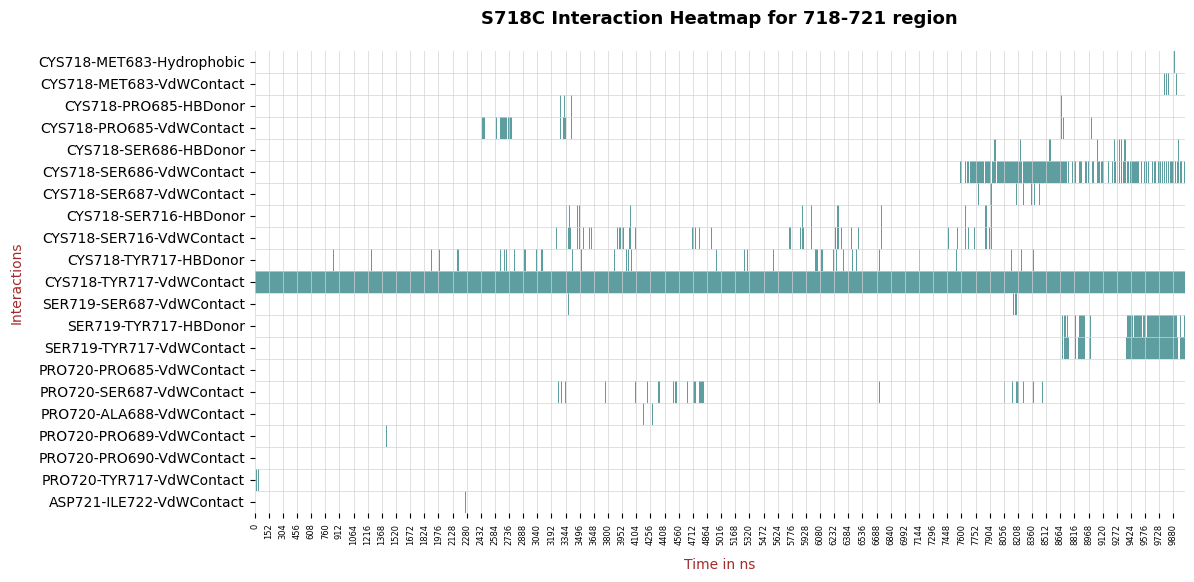

In [47]:
df_S718C_binding_motif_interactions = pickle.load(open('S718C_binding_motif.pkl', 'rb'))
plot_heatmap(df_S718C_binding_motif_interactions, 'S718C Interaction Heatmap for 718-721 region', figsize=(12, 6))

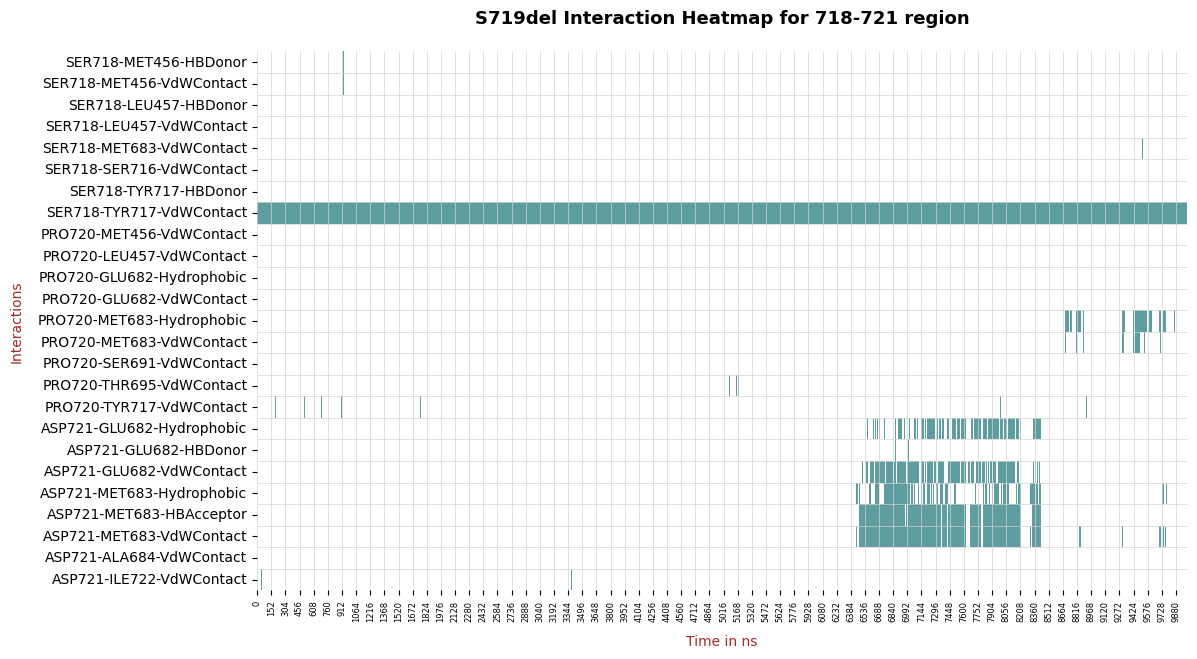

In [46]:
df_S719del_binding_motif_interactions = pickle.load(open('S719del_binding_motif.pkl', 'rb'))
plot_heatmap(df_S719del_binding_motif_interactions, 'S719del Interaction Heatmap for 718-721 region', figsize=(12, 7))

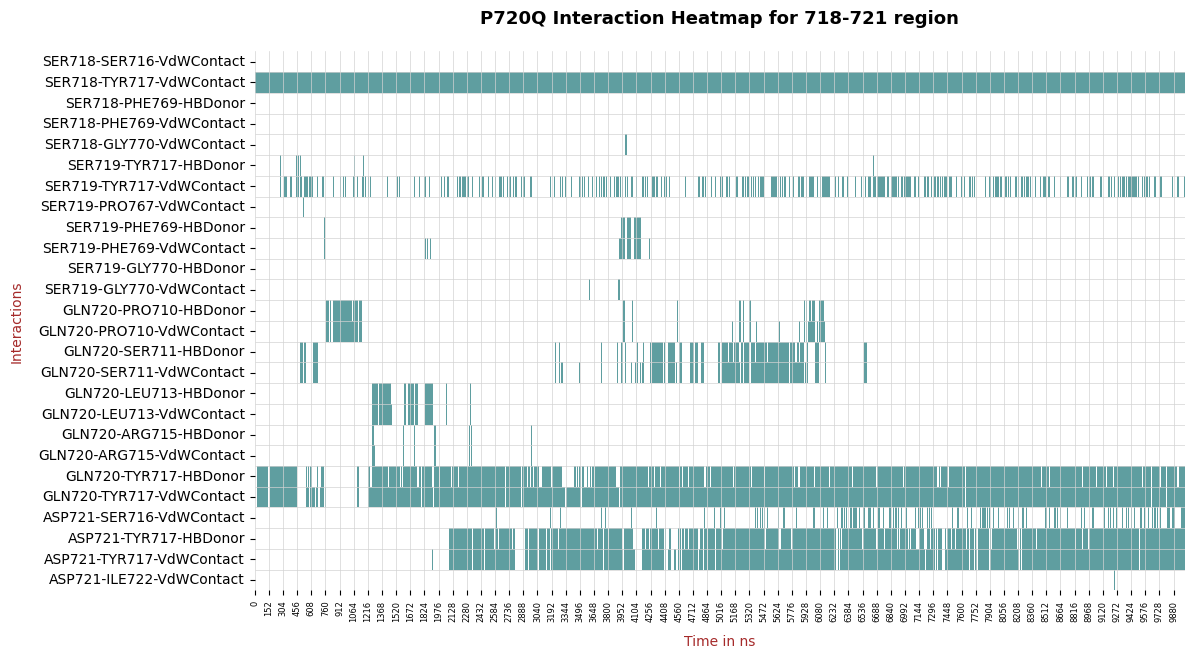

In [45]:
df_P720Q_binding_motif_interactions = pickle.load(open('P720Q_binding_motif.pkl', 'rb'))
plot_heatmap(df_P720Q_binding_motif_interactions, 'P720Q Interaction Heatmap for 718-721 region', figsize=(12, 7))

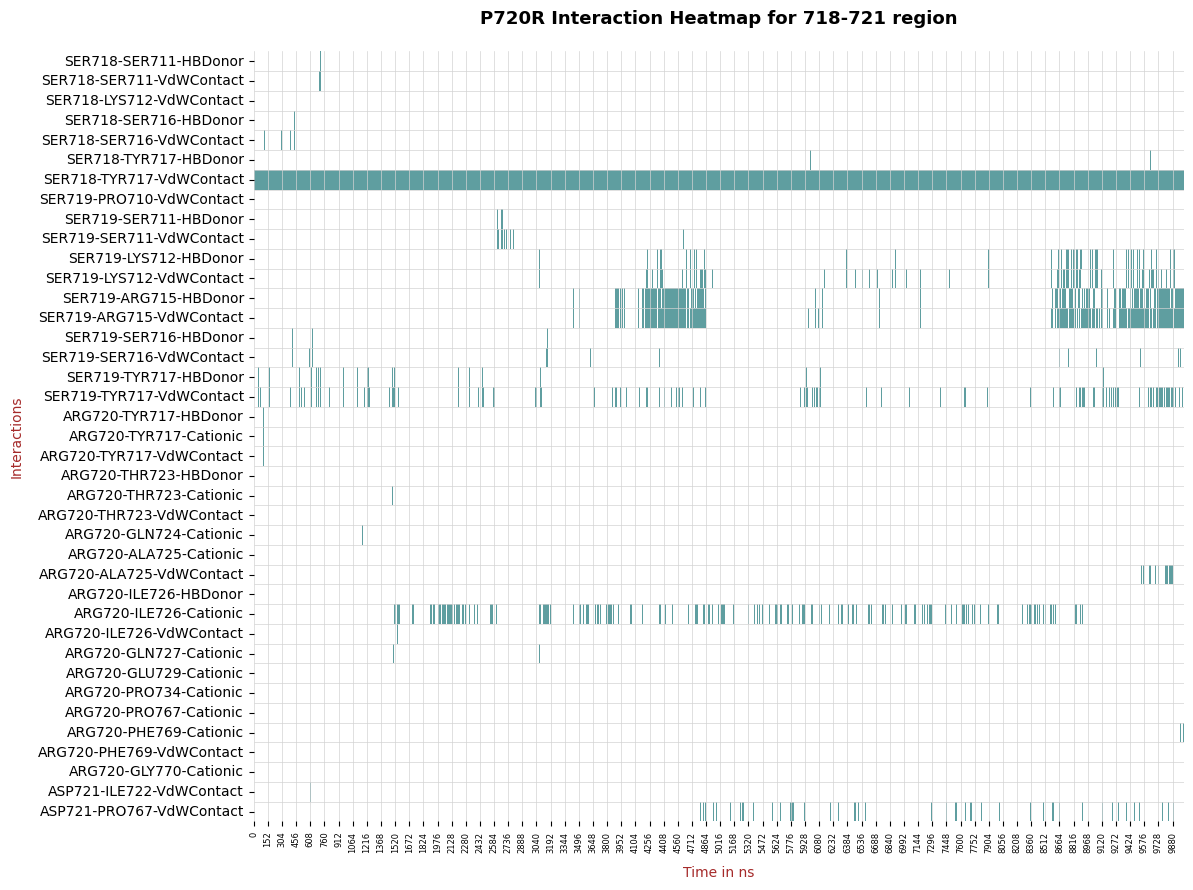

In [43]:
df_P720R_binding_motif_interactions = pickle.load(open('P720R_binding_motif.pkl', 'rb'))
plot_heatmap(df_P720R_binding_motif_interactions, 'P720R Interaction Heatmap for 718-721 region', figsize=(12, 10))

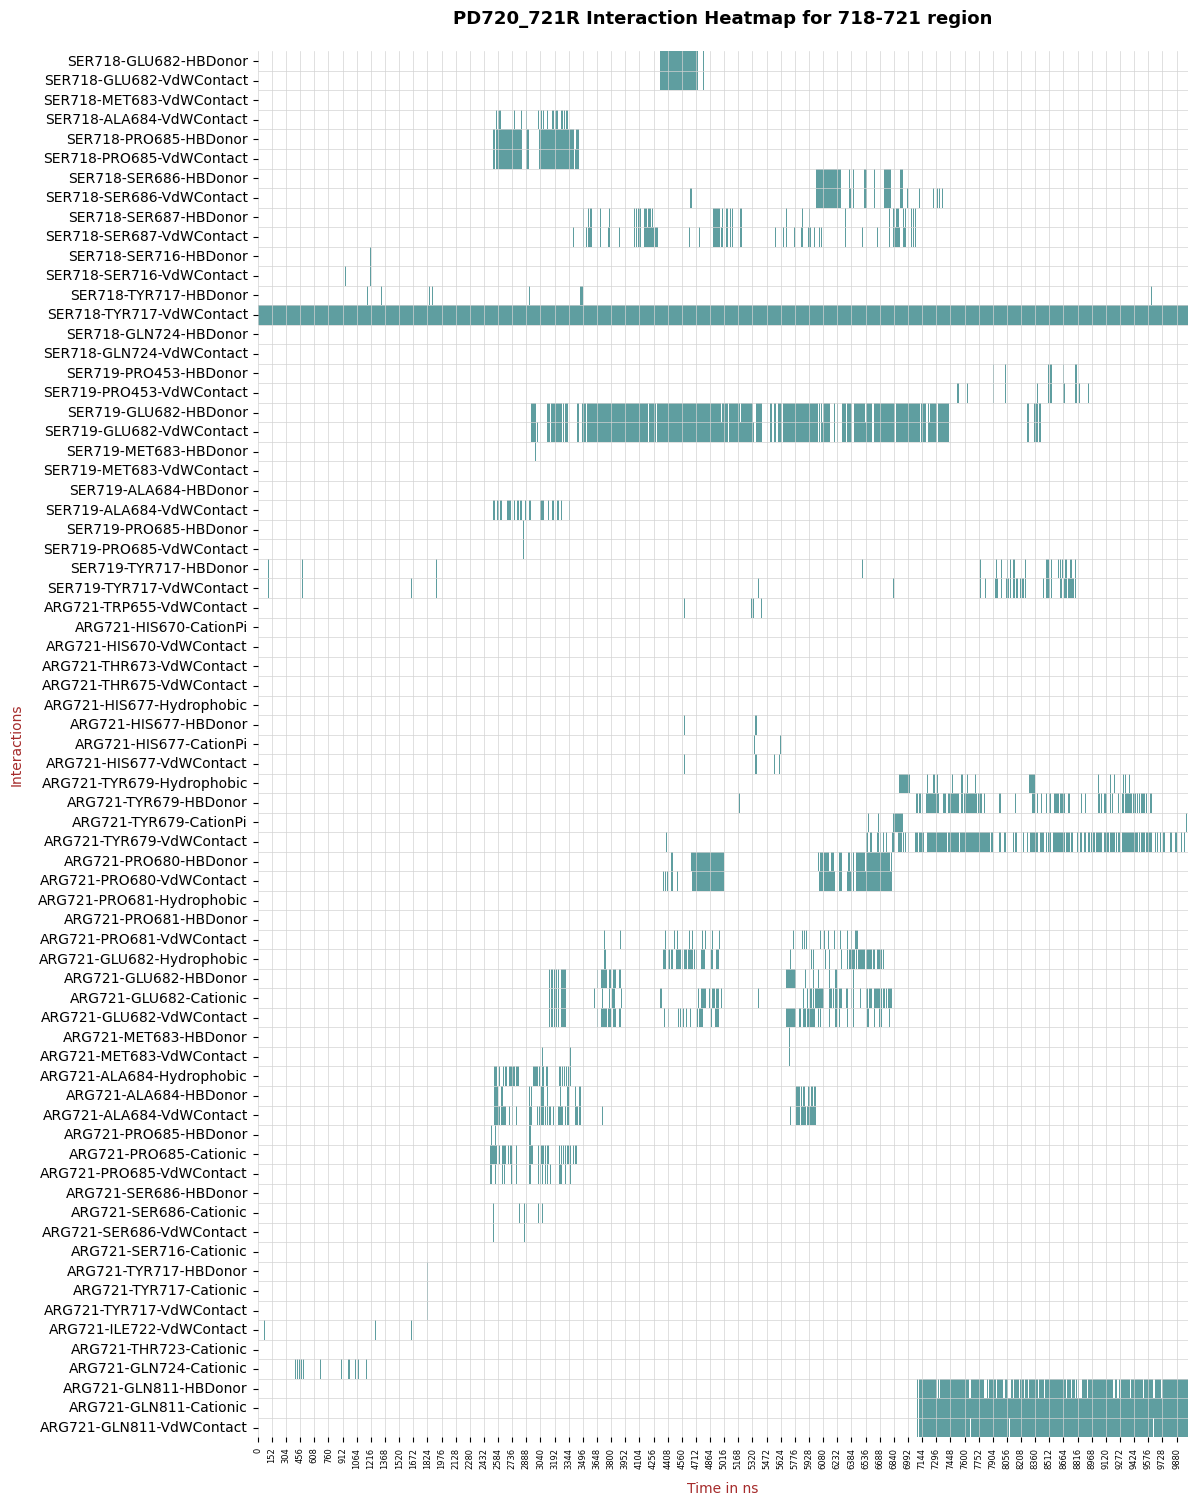

In [50]:
df_PD720_721R_binding_motif_interactions = pickle.load(open('PD720_721R_binding_motif.pkl', 'rb'))
plot_heatmap(df_PD720_721R_binding_motif_interactions, 'PD720_721R Interaction Heatmap for 718-721 region', figsize=(12, 18))

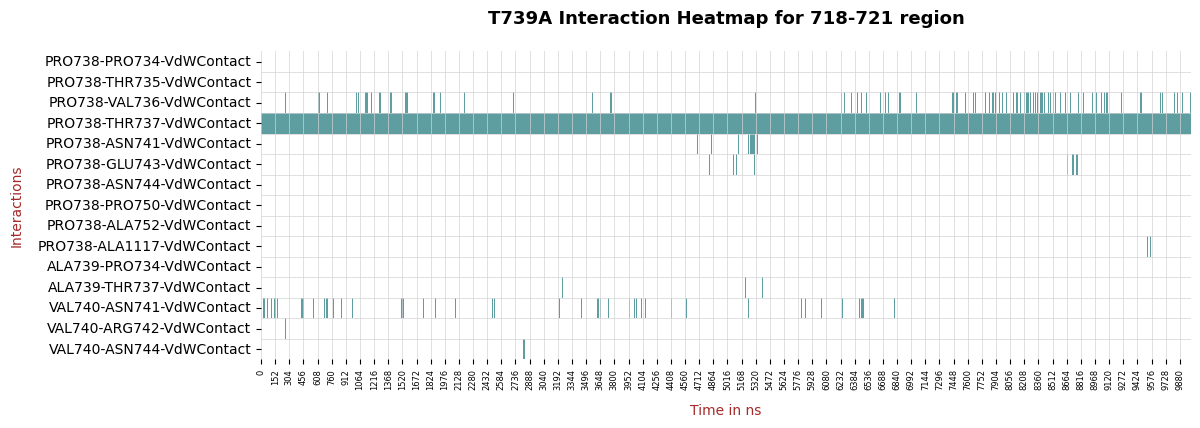

In [53]:
df_T739A_binding_motif_interactions = pickle.load(open('T739A_binding_motif.pkl', 'rb'))
plot_heatmap(df_T739A_binding_motif_interactions, 'T739A Interaction Heatmap for 718-721 region', figsize=(12, 4))

#### <span style="color:brown;"><em> NTERACTION MAPS of the WW-like domain with the rest of the protein: </em></span>

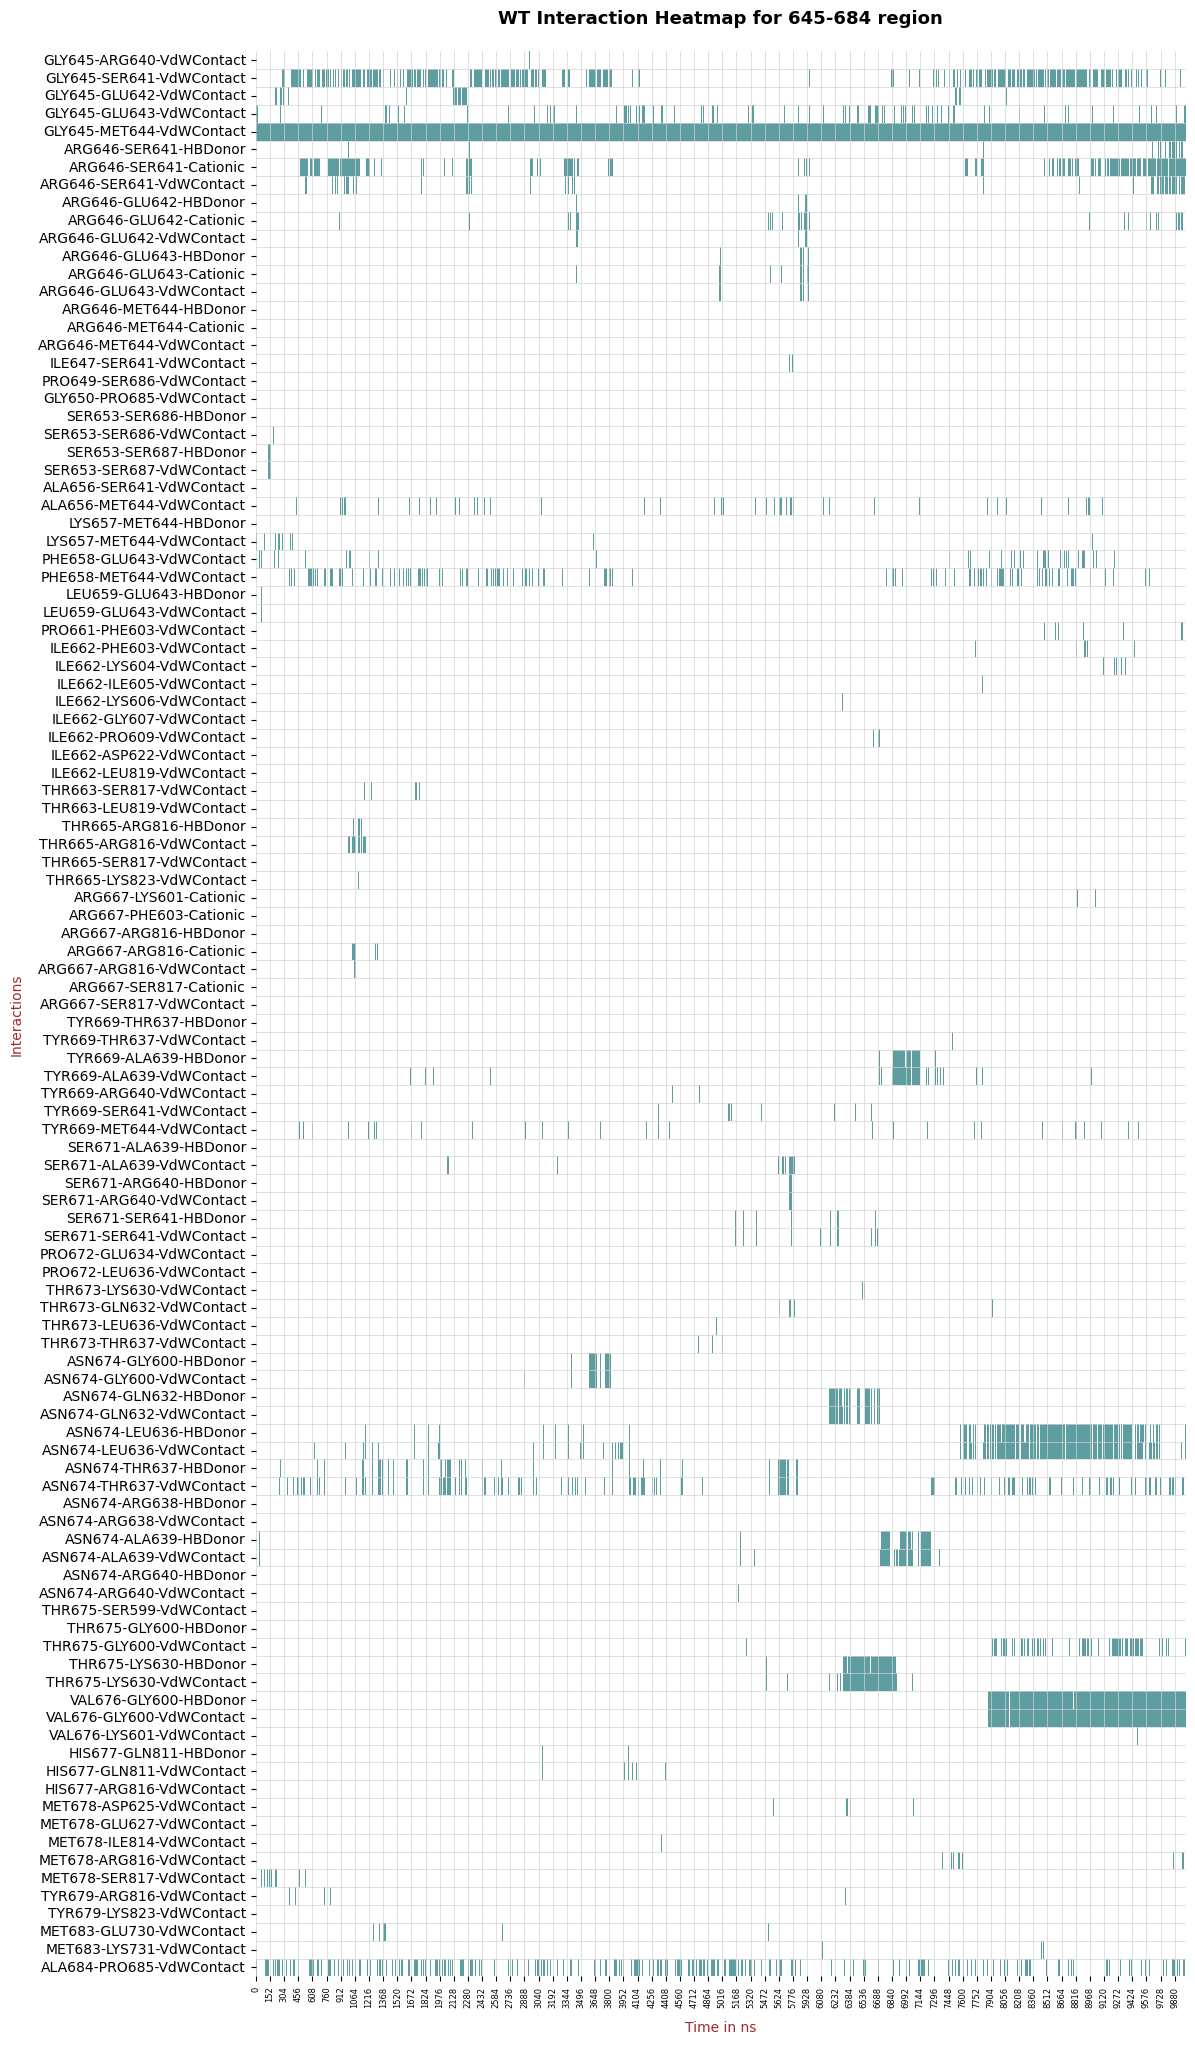

In [58]:
df_wt_ww_like_interactions = pickle.load(open('wt_ww-like.pkl', 'rb'))
plot_heatmap(df_wt_ww_like_interactions, 'WT Interaction Heatmap for 645-684 region', figsize=(12, 25))

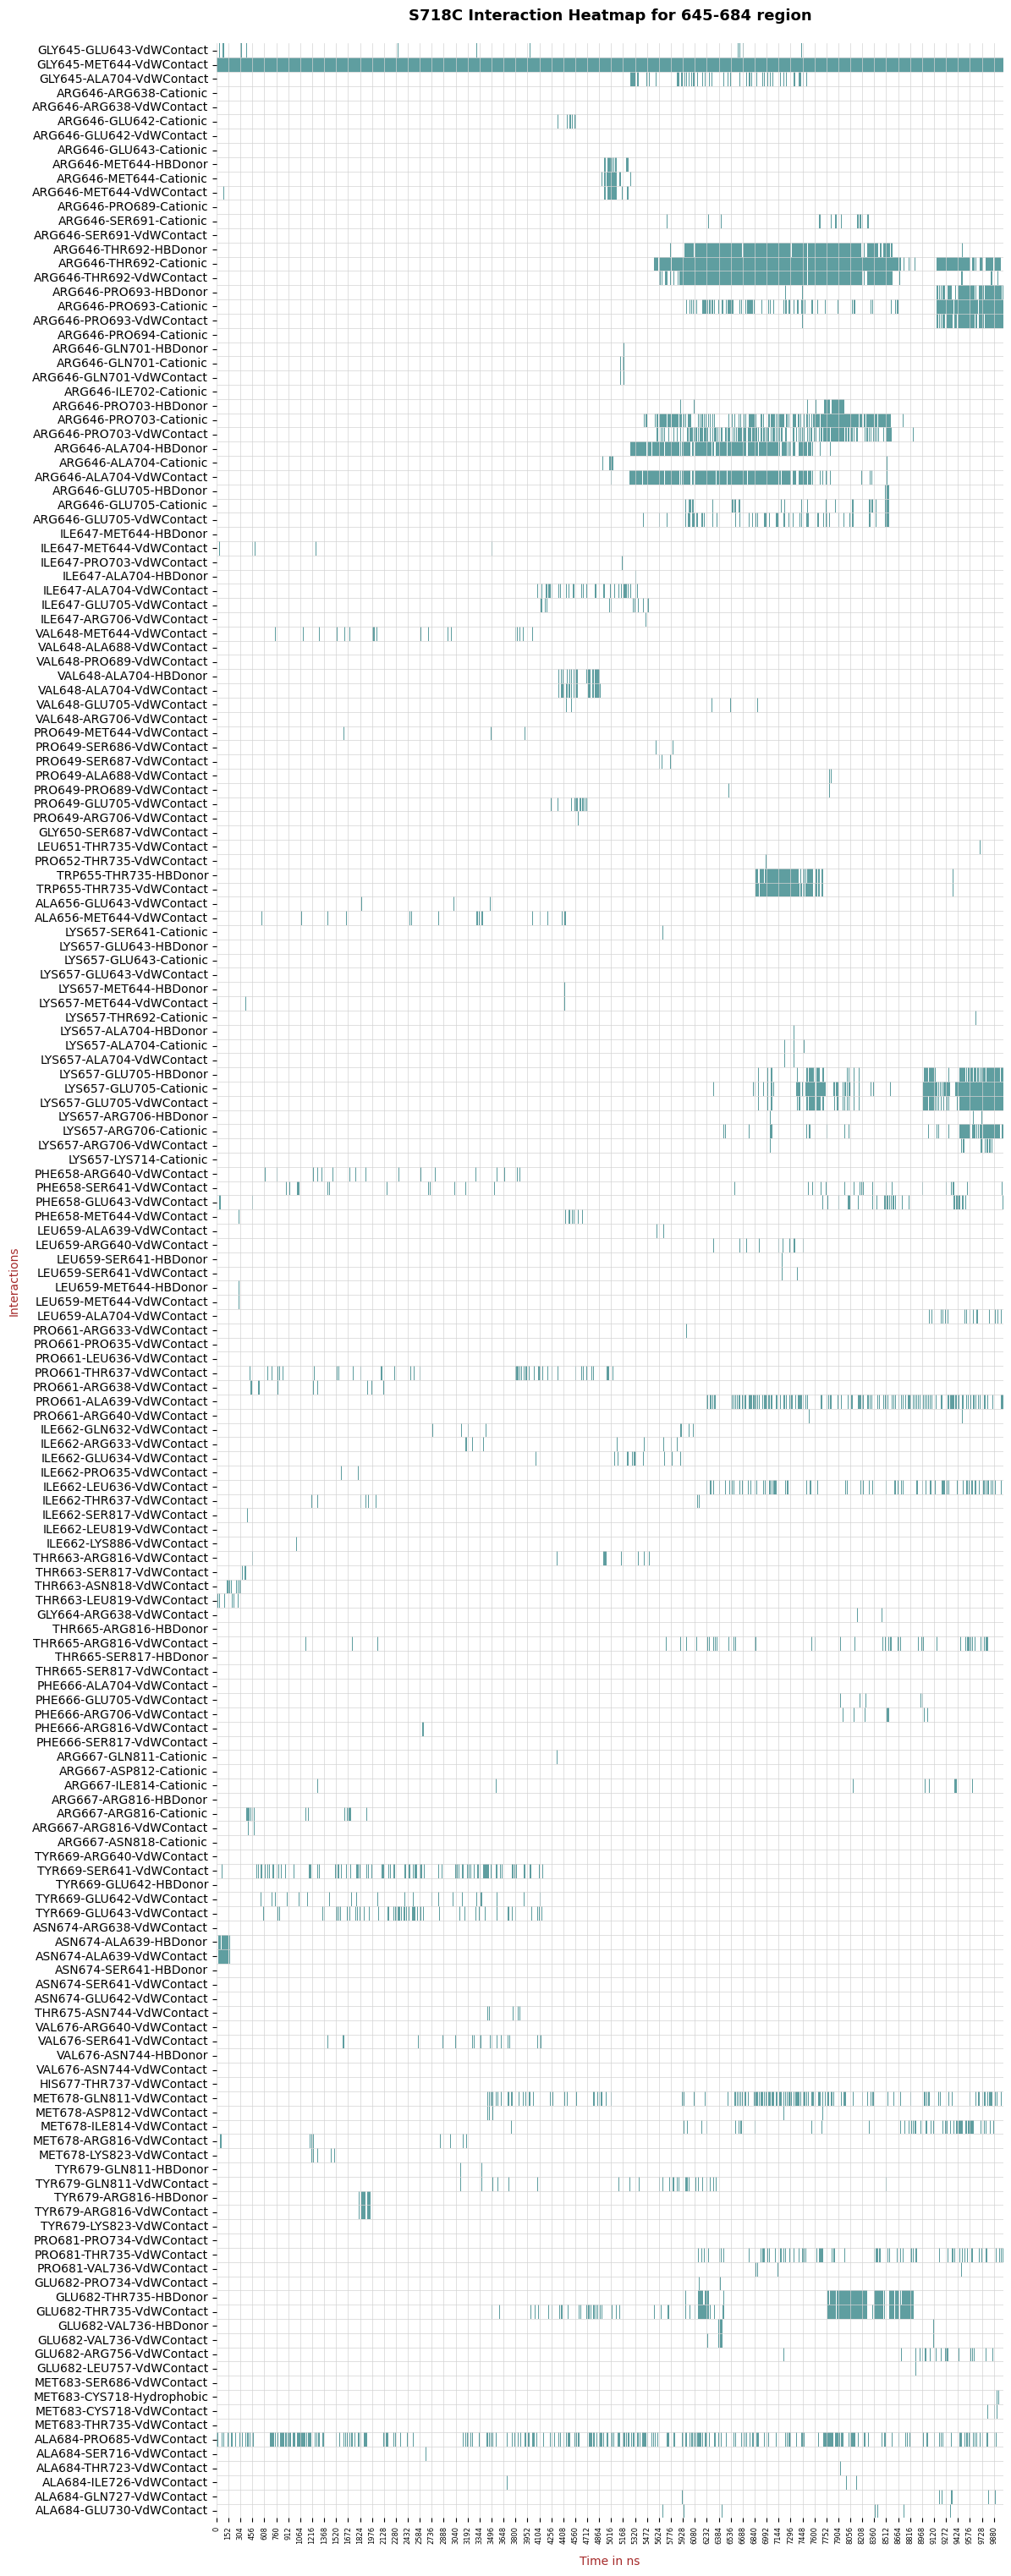

In [63]:
df_S718C_ww_like_interactions = pickle.load(open('S718C_ww-like.pkl', 'rb'))
plot_heatmap(df_S718C_ww_like_interactions, 'S718C Interaction Heatmap for 645-684 region', figsize=(12, 38))

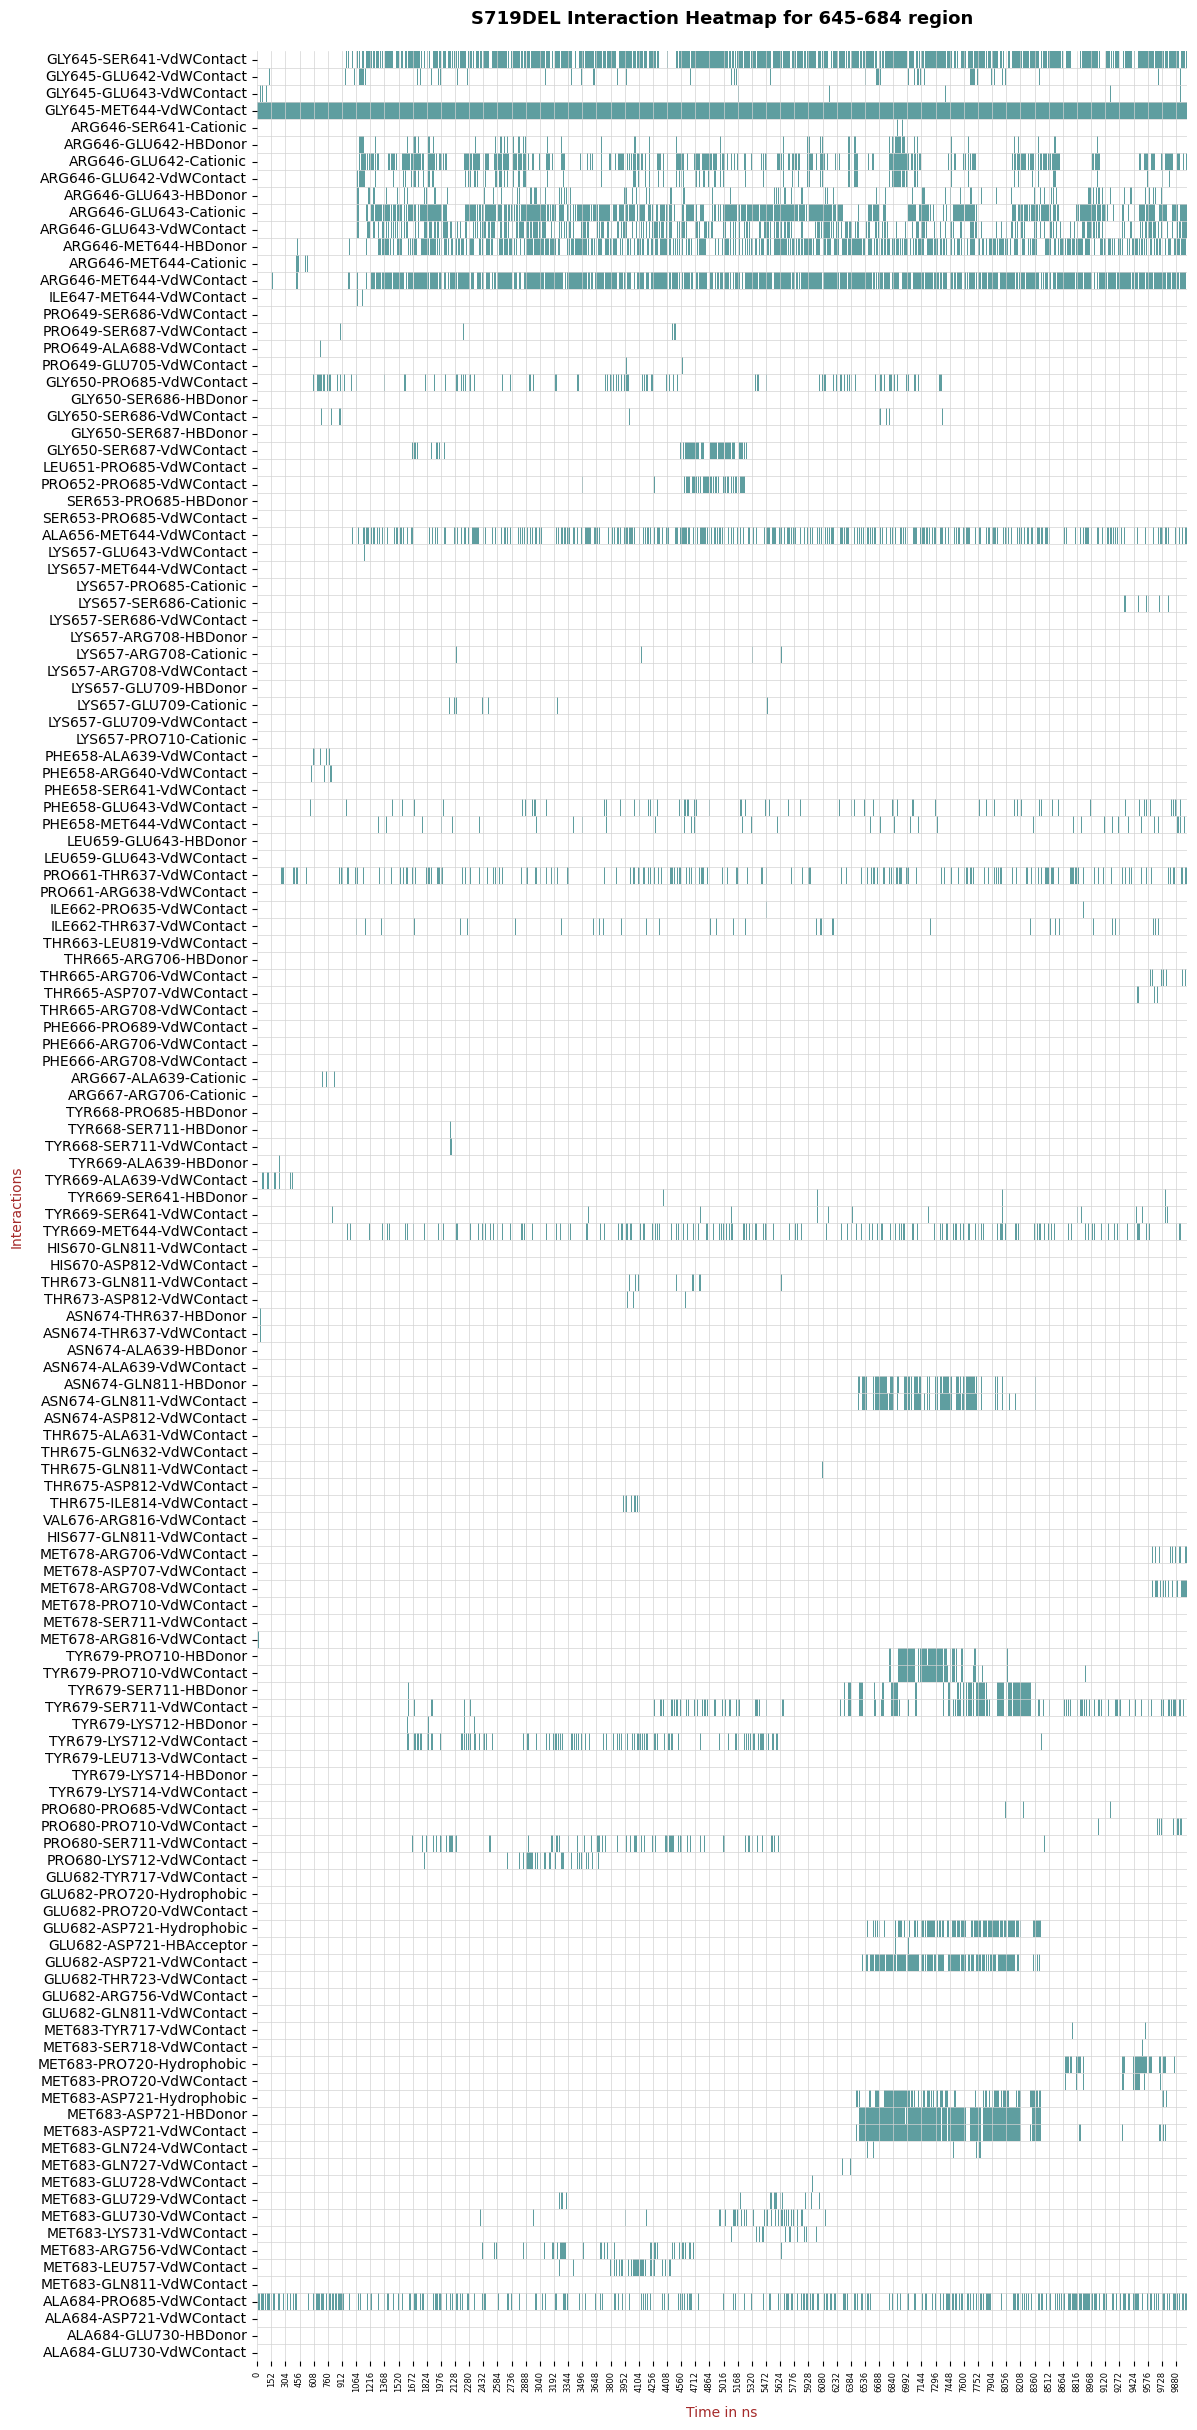

In [73]:
df_S719del_ww_like_interactions = pickle.load(open('S719del_ww-like.pkl', 'rb'))
plot_heatmap(df_S719del_ww_like_interactions, 'S719DEL Interaction Heatmap for 645-684 region', figsize=(12, 30))

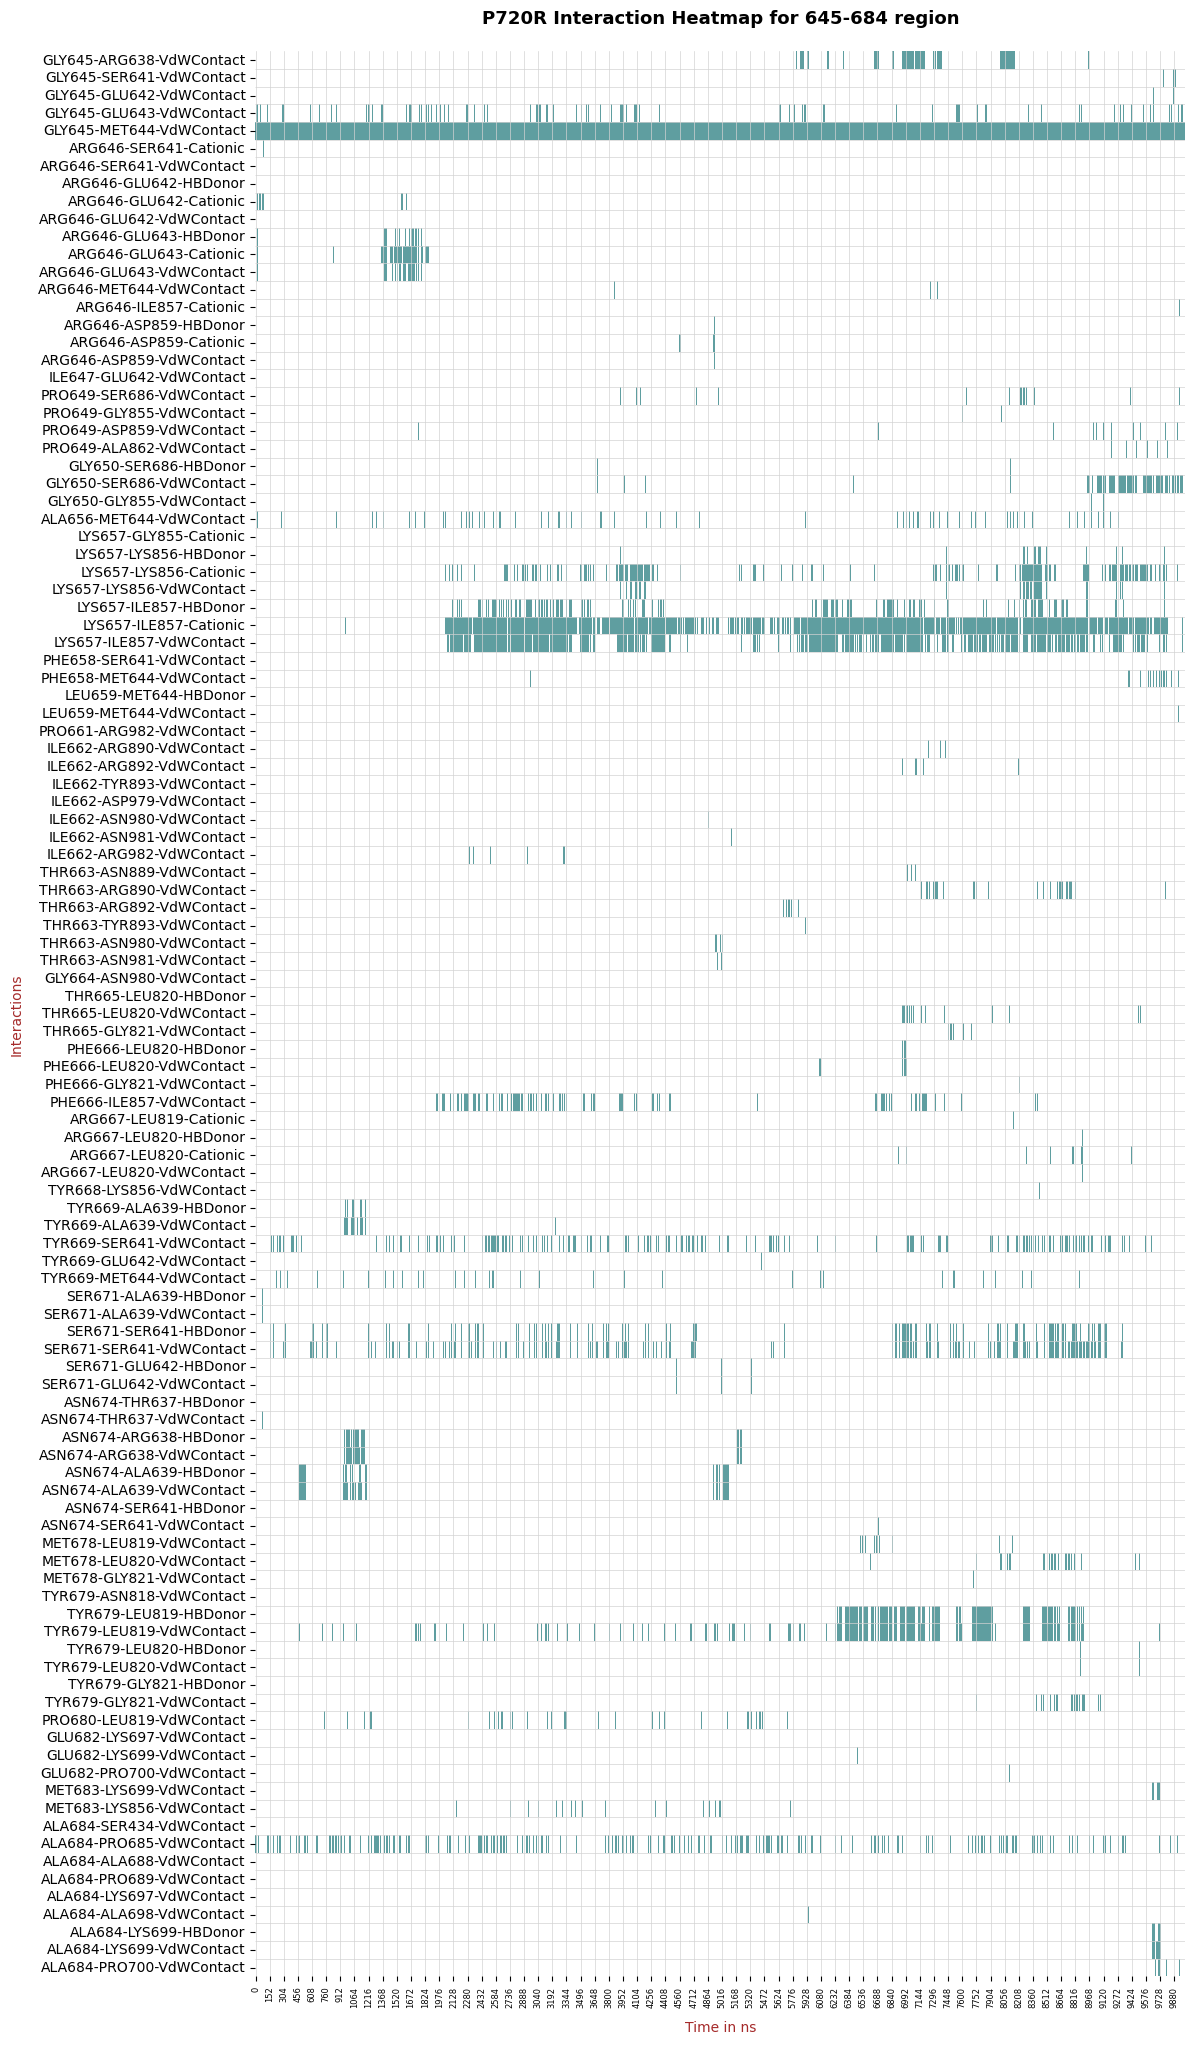

In [68]:
df_P720R_ww_like_interactions = pickle.load(open('P720R_ww-like.pkl', 'rb'))
plot_heatmap(df_P720R_ww_like_interactions, 'P720R Interaction Heatmap for 645-684 region', figsize=(12, 25))

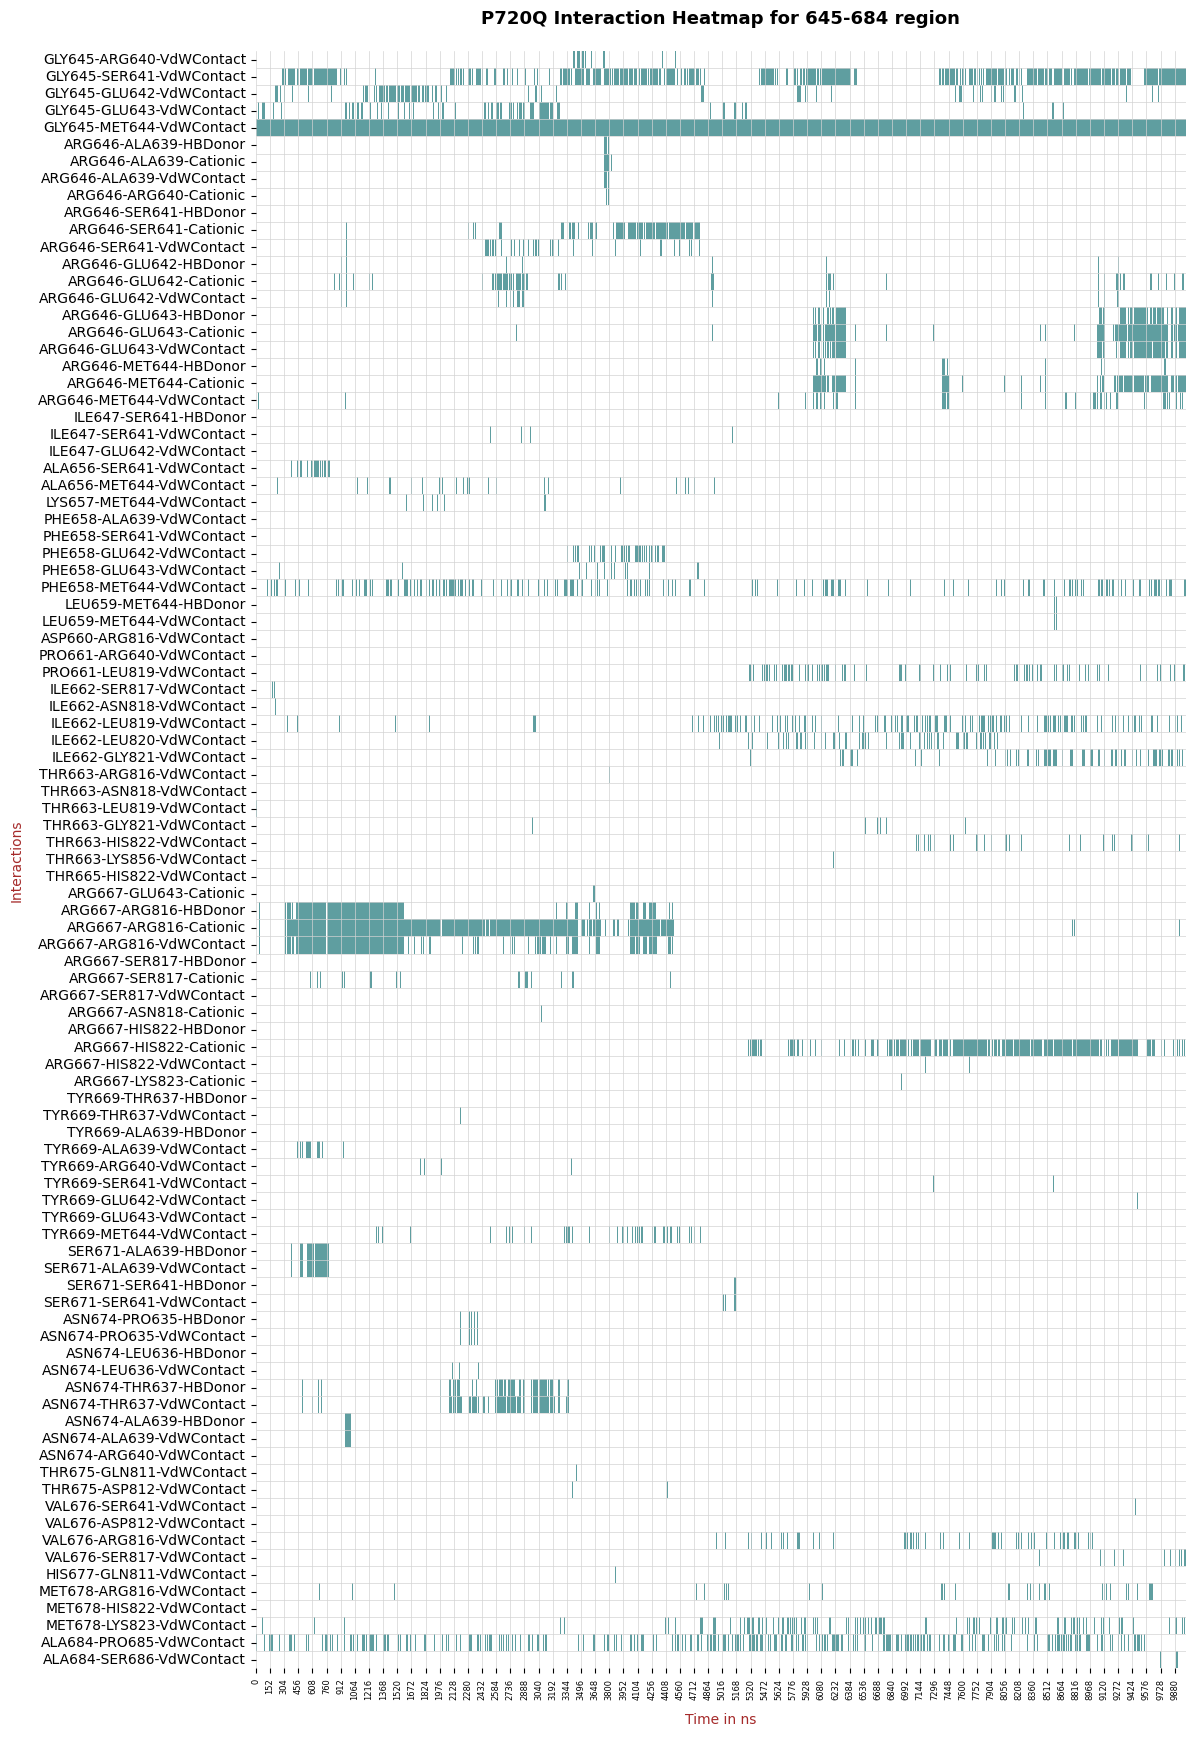

In [77]:
df_P720Q_ww_like_interactions = pickle.load(open('P720Q_ww-like.pkl', 'rb'))
plot_heatmap(df_P720Q_ww_like_interactions, 'P720Q Interaction Heatmap for 645-684 region', figsize=(12, 21))

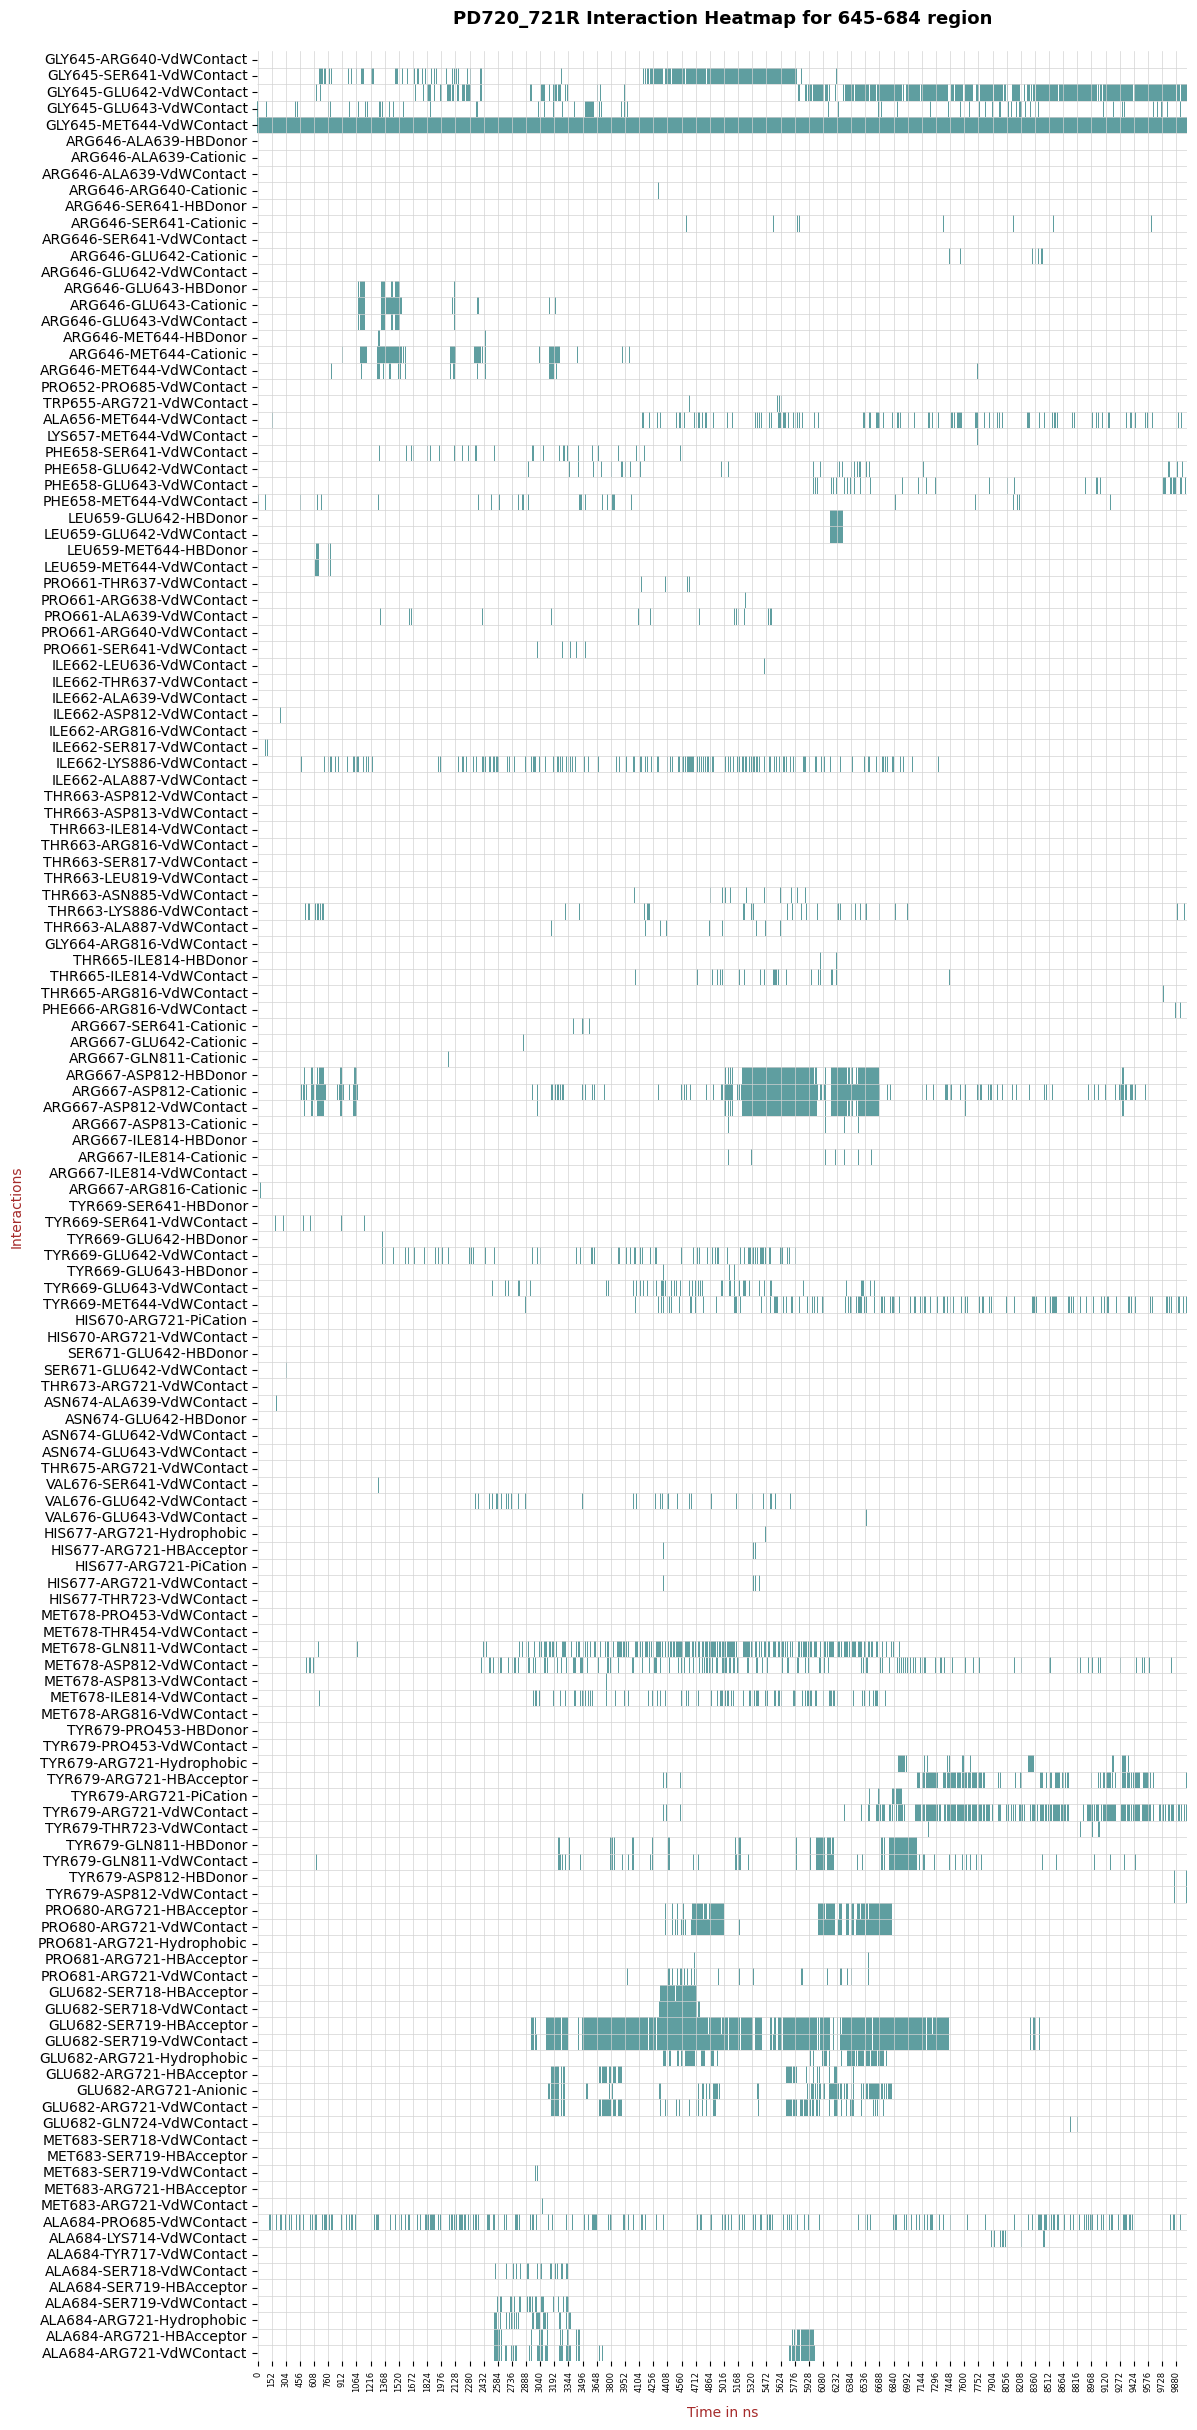

In [79]:
df_PD720_721R_ww_like_interactions = pickle.load(open('PD720_721R_ww-like.pkl', 'rb'))
plot_heatmap(df_PD720_721R_ww_like_interactions, 'PD720_721R Interaction Heatmap for 645-684 region', figsize=(12, 30))

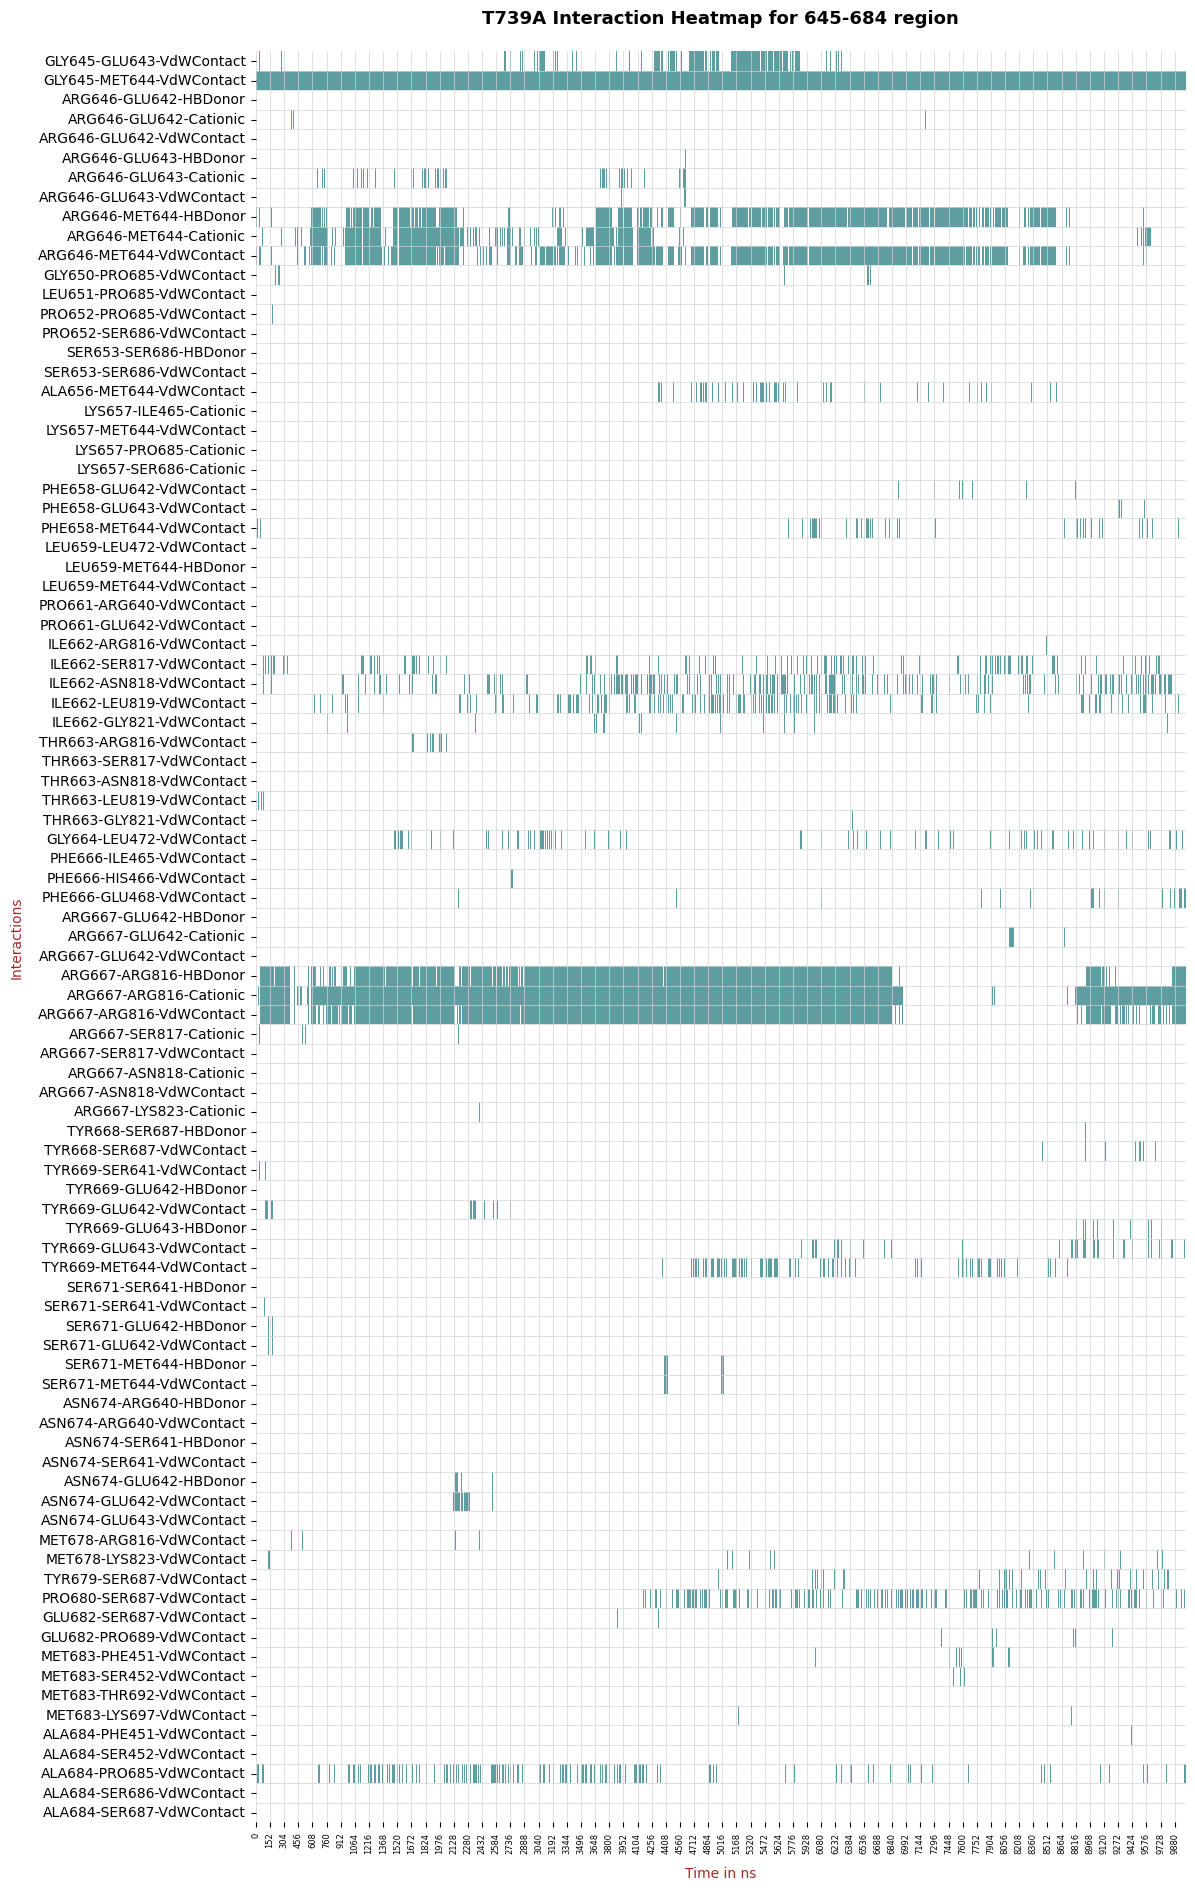

In [81]:
df_T739A_ww_like_interactions = pickle.load(open('T739A_ww-like.pkl', 'rb'))
plot_heatmap(df_T739A_ww_like_interactions, 'T739A Interaction Heatmap for 645-684 region', figsize=(12, 23))